# Object Detection using Amazon Rekognition

Following is the process flow of our project.

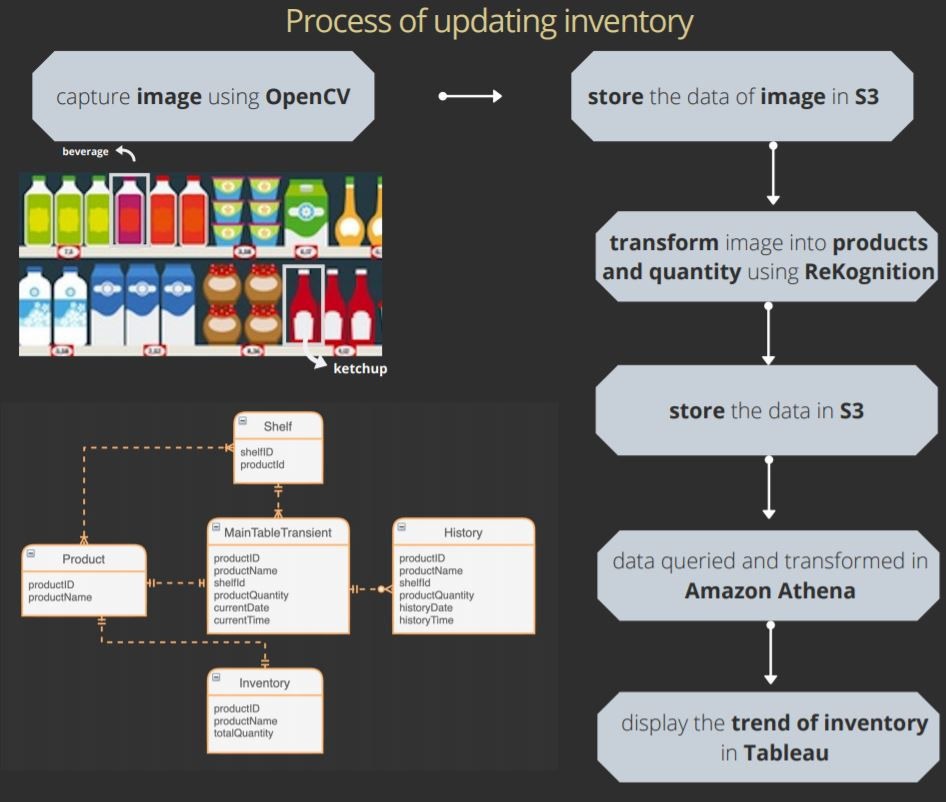

In [1]:
from IPython.display import Image
Image(r"D:\Carlson\BigDataAnalytics\Trends\process-flow.jpg")

## Step 1 : Clicking picture using webcam. 

This process can be automated to take picture after every one hour

In [3]:
# Clicking Photo

import cv2

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        
        x = 'l'
        if key == ord('s'): 
#        if key == l:     
            cv2.imwrite(filename=r'C:\Users\nitin\Downloads\trends_photos\saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread(r'C:\Users\nitin\Downloads\trends_photos\saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
#            print("Converting RGB image to grayscale...")
#            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
#            print("Converted RGB image to grayscale...")
#            print("Resizing image to 28x28 scale...")
#            img_ = cv2.resize(gray,(28,28))
#            print("Resized...")
#            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break


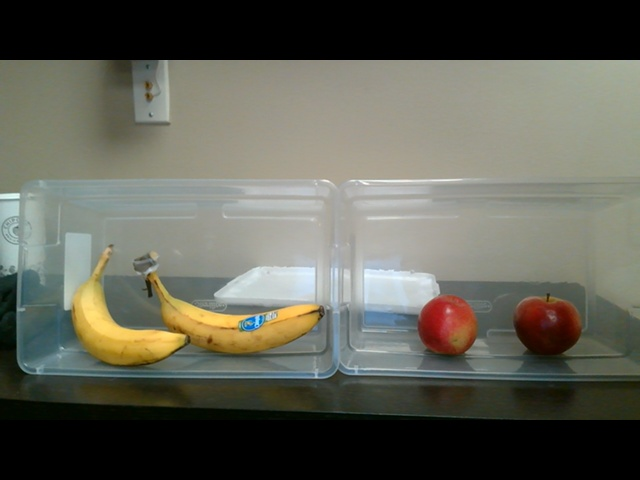

In [3]:
Image(r"C:\Users\anupa\Downloads\trends_photos\saved_img.jpg")

## Step 2 : Sending the pictures to S3 

In [4]:
# SEnding it to S3

import boto3
import pandas as pd
import datetime
session = boto3.session.Session(profile_name = 'admin_trends_1')
client = session.client('rekognition')
SOURCE_FILENAME = r'C:\Users\nitin\Downloads\trends_photos\saved_img.jpg'
BUCKET_NAME = 'trends-nirvana'

## Step 3 : Using Amazon Rekognition for object detection

In [5]:

s3 = session.resource('s3')
s3.meta.client.upload_file(Filename = SOURCE_FILENAME, Bucket = BUCKET_NAME, Key = 'saved_img.jpg')
bucketname = 'trends-nirvana' # replace with your bucket name
filename = 'saved_img.jpg' # replace with your object key
s3 = session.resource('s3')
response = client.detect_labels(Image={'S3Object':{'Bucket':bucketname,
                                                   'Name':filename}})

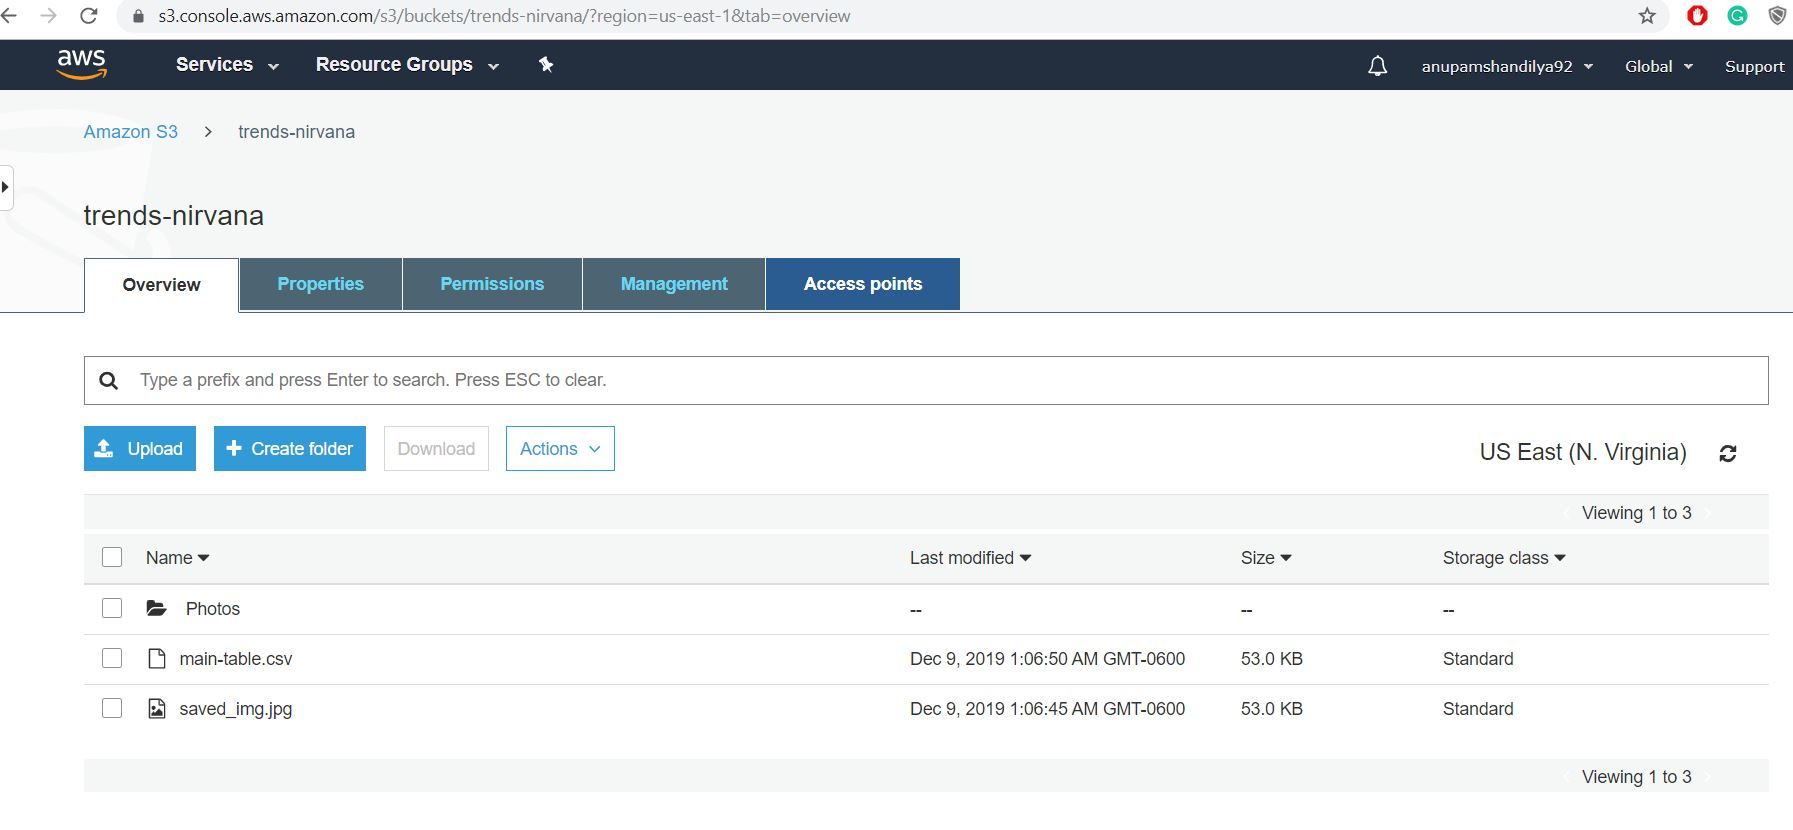

In [9]:
Image(r"D:\Carlson\BigDataAnalytics\Trends\image_s3.jpg")

## Step 4 : Uploading the results to Athena tables

In [10]:
l = list()
l1 = list()

for i in response['Labels']:
    l.append(str(datetime.datetime.now().date()))
    l.append(str(datetime.datetime.now().time()))
    l.append(i['Name'])
    l.append(len(i['Instances']))
    l1.append(l)
    
    l = list()
df = pd.DataFrame(l1, columns = ['date',
                            'time',
                            'label',
                                'count'])
df= df[df['label'].isin(['Apple','Ketchup', 'Banana'])]
prod_id = {'Apple':1,'ketchup':2,'Banana':4}
shelf_id = {'Apple':1001,'ketchup':1002,'Banana':1004}
df['shelf'] = df['label'].map(shelf_id)
df['prod_id'] = df['label'].map(prod_id)
df.to_csv(r'C:\Users\nitin\Downloads\trends_photos\main_table.csv')
SOURCE_FILENAME = r'C:\Users\nitin\Downloads\trends_photos\saved_img.jpg'
BUCKET_NAME = 'trendsdatabase'

s3 = session.resource('s3')
# Filename - File to upload
# Bucket - Bucket to upload to (the top level directory under AWS S3)
# Key - S3 object name (can contain subdirectories). If not specified then file_name is used
s3.meta.client.upload_file(Filename = SOURCE_FILENAME, Bucket = BUCKET_NAME, Key = 'main-table.csv')

In [11]:
df

,date,time,label,count,shelf,prod_id
1,2019-12-09,01:09:42.034459,Apple,2,1001,1
4,2019-12-09,01:09:42.034459,Banana,2,1004,4


After this the data is analysed in Tableau.